# AlemiWeatherPy
----

###### Note to the reader of this program: 
* Instructions have been included for each segment. We do not follow them exactly, 
* They are included to help one think through the steps. Piruz Alemi Dec 1st, 2019

* Comments:
* --------------------------------------------------------
* Include Python Libraries:
* https://pypi.python.org/pypi/citipy
* https://openweathermap.org/api

* our objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* Include a print log of each city as it's being processed with the city number and city name.
* Save both a CSV of all data retrieved and png images for each scatter plot.

* See [Example Solution](WeatherPy_Example.pdf) for a reference on expected format.


In [148]:
# APIKEY: stored in . config + make sure it is .ignored when pushed to github Alemi Dec 1st, 2019

In [149]:

# Dependencies
import time

import openweathermapy.core as owm

#config
from config import api_key
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
#api_key
#time.sleep(1)

## Generate Cities List

In [161]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
latitude =[]
longitude=[]

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1200)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1200)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    # In coordinates: latitude (vertical) is written first, then longitude (horizontal)
    if city not in cities:
        cities.append(city)
        latitude.append(lat_lng[0])
        longitude.append(lat_lng[1])
        
        
        

# Print the city count to confirm sufficient count
#len(cities)
#city
#cities
#lat_lng[0]


In [162]:
#lat_lngs
len(cities)

520

### Perform API Calls

* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

In [177]:
# Create settings dictionary with information we're interested in
settings = {"units": "metric", "appid": api_key}
# Get current weather
#for city in cities:
tempsMax=[]
humidities=[]
windSpeed=[]
clouds=[]
country=[]
dt=[]
for i in range(0,len(cities)):
    city=str(cities[i])
    #print(city)
    try:
        current_weather = owm.get_current(str(cities[i]), **settings) 
        #print(current_weather['sys']['country'])
        country.append(current_weather['sys']['country'])
        #print(current_weather['dt'])
        dt.append(current_weather['dt'])
        #print(current_weather['main'])
        #print(current_weather['clouds']["all"])
        clouds.append(current_weather['clouds']['all'])
        #print(current_weather['wind']['speed'])
        windSpeed.append(current_weather['wind']['speed'])
        #print(current_weather['main']['temp'])
        tempsMax.append(current_weather['main']['temp_max'])
        #print(current_weather['main']['humidity'])
        humidities.append(current_weather['main']['humidity'])
        #print('weather:====> ',current_weather['weather'][0]['description'])
        print(f'processing record number {i} of set | {city}')
        #print('___________________________________________________________')
        #except (TypeError, ValueError):   
        #    print("Oop!!!!s, Value Error: input does not match expected Type")
        #except (ZeroDivisionError):
        #    print("Oops, you cannot divide by Zero")
        #except (KeyError, HTTPError, NameError):
        #    print('key not found!!!!!!!!!!')
    except:
        tempsMax.append("NaN")
        clouds.append("NaN")
        dt.append("NaN")
        country.append("NaN")
        windSpeed.append("NaN")
        humidities.append("NaN")
        print(f'city: {city} not found skipping....')
        print('----------------------------------------------------------')
    #else:
    #    print(' No exception!!!!!!!! so not needed')
    #print(f"City number:{cities[i]}")
#current_weather

#print('tempsMax-----',tempsMax)

processing record number 0 of set | ribeira grande
processing record number 1 of set | kapaa
processing record number 2 of set | albany
processing record number 3 of set | saskylakh
processing record number 4 of set | poso
processing record number 5 of set | grants
processing record number 6 of set | castro
processing record number 7 of set | usinsk
processing record number 8 of set | hilo
processing record number 9 of set | dajabon
processing record number 10 of set | ushuaia
processing record number 11 of set | tuktoyaktuk
processing record number 12 of set | bluff
city: asfi not found skipping....
----------------------------------------------------------
processing record number 14 of set | tasiilaq
processing record number 15 of set | cape town
processing record number 16 of set | faanui
processing record number 17 of set | atuona
city: nizhneyansk not found skipping....
----------------------------------------------------------
processing record number 19 of set | antofagasta
pro

processing record number 160 of set | bagdarin
processing record number 161 of set | avarua
processing record number 162 of set | paamiut
processing record number 163 of set | buin
city: sinkat not found skipping....
----------------------------------------------------------
processing record number 165 of set | butaritari
city: jurado not found skipping....
----------------------------------------------------------
processing record number 167 of set | tahoua
city: tuggurt not found skipping....
----------------------------------------------------------
processing record number 169 of set | karatau
city: huazolotitlan not found skipping....
----------------------------------------------------------
processing record number 171 of set | ambovombe
city: palabuhanratu not found skipping....
----------------------------------------------------------
processing record number 173 of set | batemans bay
processing record number 174 of set | camacha
processing record number 175 of set | deputa

processing record number 313 of set | ambilobe
processing record number 314 of set | plettenberg bay
processing record number 315 of set | lakhipur
processing record number 316 of set | nigrita
processing record number 317 of set | murillo
processing record number 318 of set | dicabisagan
processing record number 319 of set | marsh harbour
processing record number 320 of set | havelock
city: vaitupu not found skipping....
----------------------------------------------------------
processing record number 322 of set | dharchula
processing record number 323 of set | chara
processing record number 324 of set | sur
processing record number 325 of set | west plains
processing record number 326 of set | verkhoshizhemye
city: umzimvubu not found skipping....
----------------------------------------------------------
processing record number 328 of set | boguchany
processing record number 329 of set | nabire
processing record number 330 of set | lorengau
processing record number 331 of set | b

processing record number 469 of set | namibe
processing record number 470 of set | havre-saint-pierre
processing record number 471 of set | imeni babushkina
processing record number 472 of set | okhotsk
processing record number 473 of set | ugoofaaru
processing record number 474 of set | pinheiro machado
processing record number 475 of set | baiyin
processing record number 476 of set | lake charles
processing record number 477 of set | alegrete
processing record number 478 of set | east stroudsburg
processing record number 479 of set | harper
processing record number 480 of set | sao joao da barra
processing record number 481 of set | ulladulla
processing record number 482 of set | bud
processing record number 483 of set | grand gaube
processing record number 484 of set | dhidhdhoo
city: ozgon not found skipping....
----------------------------------------------------------
processing record number 486 of set | iisalmi
city: falealupo not found skipping....
----------------------------

In [164]:
#- convert celcius temperature to farenheight, rounded to zero decimal points
tempsF = tempsMax
for i in range(0,len(tempsMax)):
    if (tempsMax[i] != "NaN"):
        tempsF[i] = (tempsMax[i] * 9/5) + 32
#tempsF
#tempsMax

[64.112,
 80.6,
 26.996000000000002,
 -34.69,
 74.984,
 33.8,
 55.4,
 21.776,
 73.004,
 73.994,
 51.8,
 5.0,
 89.834,
 'NaN',
 30.2,
 64.4,
 82.742,
 79.322,
 'NaN',
 64.4,
 73.4,
 56.516,
 16.358,
 58.064,
 73.31,
 33.8,
 59.0,
 'NaN',
 30.992,
 42.007999999999996,
 48.92,
 'NaN',
 73.004,
 68.0,
 44.726,
 71.006,
 69.8,
 73.4,
 30.992,
 82.328,
 12.488,
 15.116,
 68.21600000000001,
 17.6,
 9.283999999999999,
 44.6,
 51.8,
 82.04,
 75.2,
 78.8,
 15.997999999999998,
 71.6,
 55.976,
 21.002,
 80.6,
 33.8,
 79.916,
 -5.799999999999997,
 69.008,
 60.007999999999996,
 68.0,
 69.998,
 82.4,
 43.592,
 27.86,
 48.74,
 -2.631999999999998,
 80.6,
 1.0040000000000013,
 64.994,
 32.0,
 57.92,
 57.002,
 41.0,
 57.2,
 25.358,
 77.0,
 6.565999999999999,
 61.39399999999999,
 21.002,
 69.008,
 24.8,
 77.0,
 'NaN',
 42.674,
 55.004,
 55.994,
 'NaN',
 7.735999999999997,
 53.006,
 15.997999999999998,
 8.600000000000001,
 40.172,
 64.4,
 33.008,
 81.212,
 78.098,
 82.4,
 80.996,
 86.0,
 64.994,
 76.586,
 

In [165]:
# print current weather
#print(f"Current weather object for city number: {i}, {current_weather}.")
current_weather.keys()
#current_weather

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [227]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": cities,
    'cloudiness': clouds,
    'country': country,
    'date': dt,
    'humidity': humidities,
    "latitude": latitude,
    "longitude": longitude,
    "Max Temperature": tempsF,
    'Wind Speed': windSpeed
   
}
weather_data = pd.DataFrame(weather_dict)
#if (weather_data['Max Temperature']).any !='NaN':
#print("found Nan")
#if weather_data.isnull().values.any():
#if weather_data.isnull().values.any():
#    pass
#else:
#    np.round(int(weather_data['Max Temperature']),decimals=2)   
weather_data.head()
#print("found Nan")

,city,cloudiness,country,date,humidity,latitude,longitude,Max Temperature,Wind Speed
0,ribeira grande,99,PT,1575247227,92,36.742881,-34.667930,64.112,7.01
1,kapaa,1,US,1575247227,69,9.508349,-176.800668,80.6,8.7
2,albany,90,US,1575247030,79,-78.915146,111.690779,26.996,3.6
3,saskylakh,37,RU,1575247227,97,85.802076,111.322172,-34.69,1.22
4,poso,100,ID,1575247227,65,-1.057709,121.255253,74.984,1.15


In [228]:
# saving the dataframe 
# weather_data.to_csv('alemi_weather_data.csv', header=False, index=False) 
# saving the dataframe to a spcific location 
weather_data.to_csv(r'..\alemi_weather_data3.csv', index=False) 


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

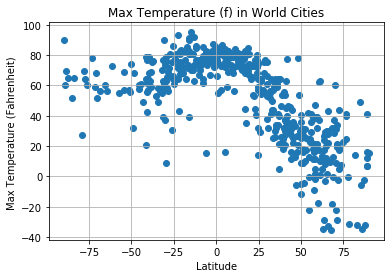

In [229]:
# Build a scatter plot for each data type
plt.scatter(weather_data["latitude"], weather_data["Max Temperature"], marker="o")

# Incorporate the other graph properties
plt.title("Max Temperature (f) in World Cities")
plt.ylabel("Max Temperature (Fahrenheit) ")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

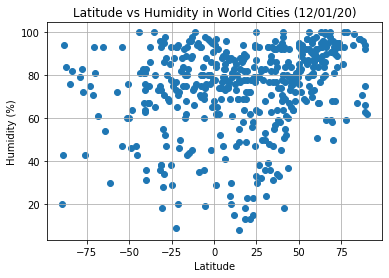

In [230]:
# Build a scatter plot for each data type
plt.scatter(weather_data["latitude"], weather_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Humidity in World Cities (12/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeHumidityInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

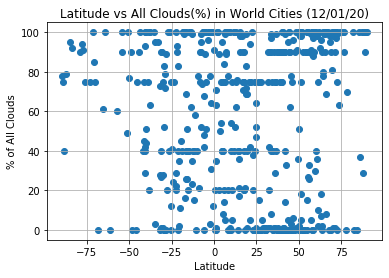

In [231]:
# Build a scatter plot for each data type
plt.scatter(weather_data["latitude"], weather_data["cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs All Clouds(%) in World Cities (12/01/20)")
plt.xlabel("Latitude")
plt.ylabel("% of All Clouds")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeCloudsInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

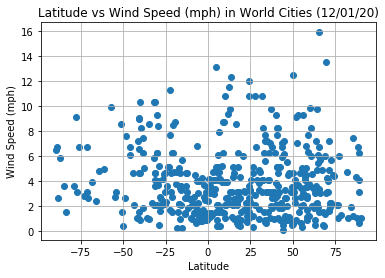

In [232]:
# Build a scatter plot for each data type
plt.scatter(weather_data["latitude"], weather_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed (mph) in World Cities (12/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeWindSpeedInWorldCities.png")

# Show plot
plt.show()